In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import datetime
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=(10,6)

In [2]:
stock='TSLA'

In [3]:
start=datetime.datetime(2021,1,1)
end=datetime.datetime(2023,12,31)
tsla_close=yf.download(stock,start=start,end=end,interval='1d')['Close']



[*********************100%***********************]  1 of 1 completed


In [4]:
tsla_close.head()

Date
2020-12-31    235.223328
2021-01-04    243.256668
2021-01-05    245.036667
2021-01-06    251.993332
2021-01-07    272.013336
Name: Close, dtype: float64

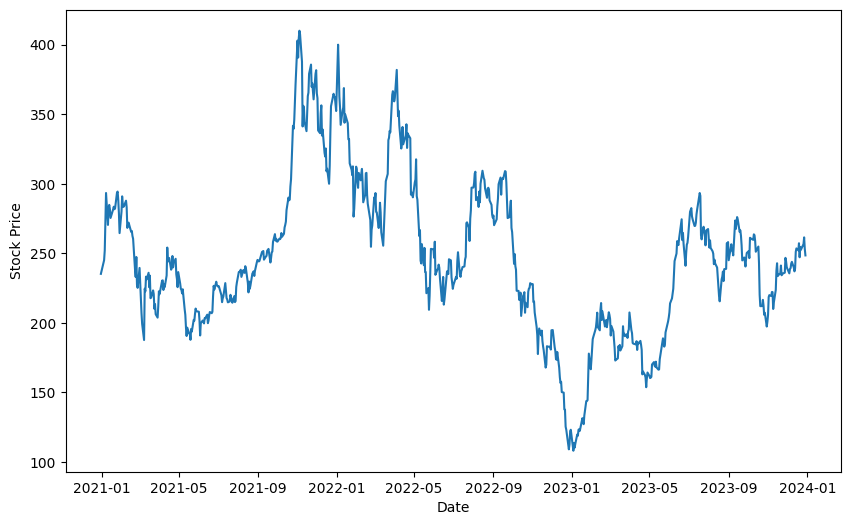

In [5]:
plt.plot(tsla_close)
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.show()

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose

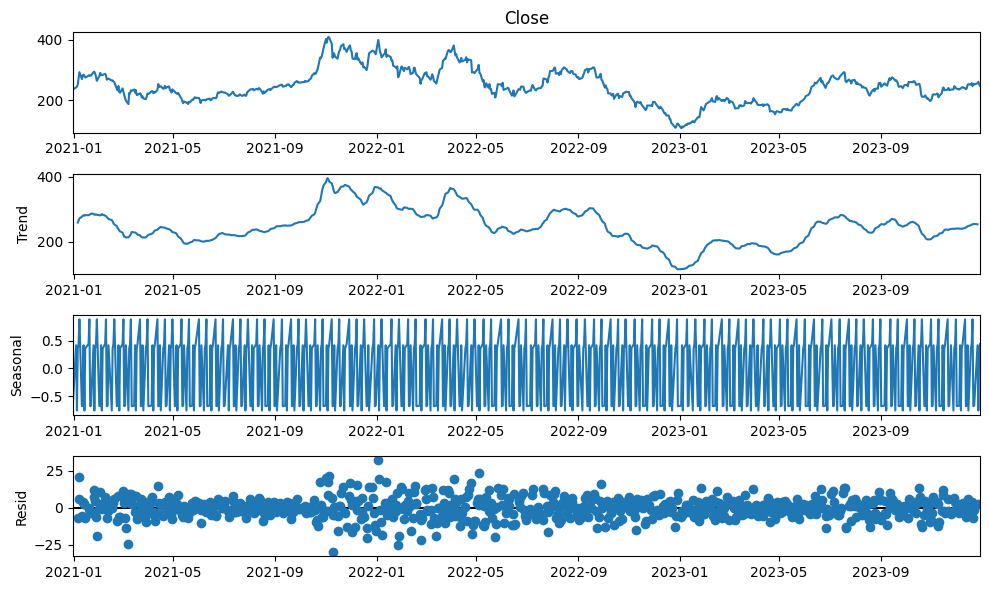

In [7]:
decompose=seasonal_decompose(tsla_close,model='additive',period=7)
decompose.plot()
plt.show()

In [10]:
tsla_close=pd.DataFrame(tsla_close)

In [11]:
tsla_close.isnull().sum()

Close    0
dtype: int64

In [12]:
tsla_close.iloc[-5]=np.NaN

In [17]:
tsla_close["close_ff"]=tsla_close["Close"].ffill()
tsla_close.tail(6)

,Close,close_ff,close_bf
Date,,,
2023-12-21,254.500000,254.500000,254.500000
2023-12-22,NaN,254.500000,256.609985
2023-12-26,256.609985,256.609985,256.609985
2023-12-27,261.440002,261.440002,261.440002
2023-12-28,253.179993,253.179993,253.179993
2023-12-29,248.479996,248.479996,248.479996


In [19]:
tsla_close["close_bf"]=tsla_close["Close"].bfill()
tsla_close.tail(6)

,Close,close_ff,close_bf
Date,,,
2023-12-21,254.500000,254.500000,254.500000
2023-12-22,NaN,254.500000,256.609985
2023-12-26,256.609985,256.609985,256.609985
2023-12-27,261.440002,261.440002,261.440002
2023-12-28,253.179993,253.179993,253.179993
2023-12-29,248.479996,248.479996,248.479996


In [20]:
from scipy import interpolate
tsla_close['tsla_close_interpolate']=tsla_close["Close"].interpolate(options='time')

In [21]:
tsla_close.tail(6)

,Close,close_ff,close_bf,tsla_close_interpolate
Date,,,,
2023-12-21,254.500000,254.500000,254.500000,254.500000
2023-12-22,NaN,254.500000,256.609985,255.554993
2023-12-26,256.609985,256.609985,256.609985,256.609985
2023-12-27,261.440002,261.440002,261.440002,261.440002
2023-12-28,253.179993,253.179993,253.179993,253.179993
2023-12-29,248.479996,248.479996,248.479996,248.479996


# Isolation Forest

In [22]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

In [26]:
scaler=StandardScaler()
tsla_scaled=scaler.fit_transform(tsla_close['tsla_close_interpolate'].values.reshape(-1,1))
tsla_scaled=pd.DataFrame(tsla_scaled)

In [28]:
tsla_scaled.head()

,0
0,-0.210346
1,-0.065638
2,-0.033573
3,0.091740
4,0.452371


In [29]:
#contamination=0.1 #initaial guess
outlier_fractions=0.01
isolation_model=IsolationForest(contamination=outlier_fractions)
isolation_model.fit(tsla_scaled)
tsla_scaled['anomly']=isolation_model.predict(tsla_scaled)

In [30]:
tsla_scaled['anomly'].value_counts()

 1    746
-1      8
Name: anomly, dtype: int64